# Plot and Tabulate Grid Refinement Studies

In [1]:
using CLOUD
using Plots; pyplot()
sequence_path = [
    "results/advection_CollapsedModal_p4M2l1_20220622_215437/",
    "results/advection_CollapsedModal_p4M2l0_20220622_215437/",
    "results/advection_CollapsedModal_p9M2l1_20220622_215437/",
    "results/advection_CollapsedModal_p9M2l0_20220622_215436/"]
labels = ["\$p=4\$, upwind flux","\$p=4\$, central flux",
"\$p=9\$, upwind flux","\$p=9\$, central flux"]
n = length(sequence_path)
analysis_path = "./"
(conservation_law, spatial_discretization, 
    initial_data, form, tspan, strategy) = load_project(
        string(sequence_path[1],"grid_1/"));
refinement_analysis = [RefinementAnalysis(initial_data, sequence_path[i],
    analysis_path, labels[i]) for i in 1:n]
refinement_results = [analyze(refinement_analysis[1], 5), 
    analyze(refinement_analysis[2], 5),
    analyze(refinement_analysis[3], 4),
    analyze(refinement_analysis[4], 4)]
tabulate_analysis_for_paper((refinement_results[1],refinement_results[2]))
tabulate_analysis_for_paper((refinement_results[3],refinement_results[4]))

┌ Info: Installing pyqt package to avoid buggy tkagg backend.
└ @ PyPlot /Users/tristanmontoya/.julia/packages/PyPlot/XaELc/src/init.jl:118


\begin{table}
  \begin{tabular}{rrrrrrrrr}
    \toprule
    \textbf{$N_e$} & \textbf{Conservation Metric} &  & \textbf{Energy Metric} &  & \textbf{$L^2$ Error} &  & \textbf{Order} &  \\\midrule
    & 8 & -2.984e-16 & 9.957e-16 & -2.283e-02 & -7.327e-15 & 1.098e-01 & 1.815e-01 &  &  \\
    & 32 & -2.334e-15 & -6.301e-16 & -1.668e-03 & 1.180e-15 & 1.415e-02 & 4.044e-02 & 2.96 & 2.17 \\
    & 128 & 5.539e-16 & -2.626e-16 & -8.943e-06 & 1.818e-15 & 5.349e-04 & 4.170e-03 & 4.73 & 3.28 \\
    & 512 & -3.107e-15 & -3.065e-15 & -2.362e-08 & 2.692e-15 & 1.581e-05 & 2.062e-04 & 5.08 & 4.34 \\
    & 2048 & -1.703e-14 & -1.851e-14 & -4.991e-11 & 1.776e-14 & 4.973e-07 & 3.566e-06 & 4.99 & 5.85 \\\bottomrule
  \end{tabular}
\end{table}
\begin{table}
  \begin{tabular}{rrrrrrrrr}
    \toprule
    \textbf{$N_e$} & \textbf{Conservation Metric} &  & \textbf{Energy Metric} &  & \textbf{$L^2$ Error} &  & \textbf{Order} &  \\\midrule
    & 8 & -5.492e-15 & -6.687e-15 & -1.761e-05 & -6.939e-16 & 1.138e-03 & 

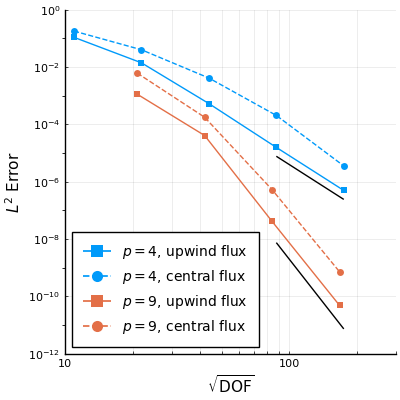

In [2]:
plot_analysis(refinement_analysis, refinement_results, xlims=(10.0, 200.0),
    ylims=(1.0e-12,1.0), reference_line=[(5,4.0e4), (10,2.0e11)], filename="plots/modal_p4p9.pdf")